In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmatdmat

%cd /media/Projects/Adrian/seizureProcessing/
from seizureProcessing.matlab_translations.get_combinatomats import *

/media/Projects/Adrian/seizureProcessing


In [5]:
path = '/media/Seizures/jul2024_getCombinatomats_TestScript'
opath = os.path.join(path, 'results_adrian')

out_dic, sp_dic, tm_dic = get_combinatomats(path=path, label='bit', outpath=opath, artifacts=True)

In [14]:
times_noart = loadmat(os.path.join(opath, 'times_pos_CSC1_withoutArtifacts.mat'))
times_art = loadmat(os.path.join(opath, 'times_pos_CSC1_withArtifacts.mat'))

In [16]:
cluster_id_noart = np.unique(times_noart['cluster_class'].T[0])
cluster_id_art = np.unique(times_art['cluster_class'].T[0])

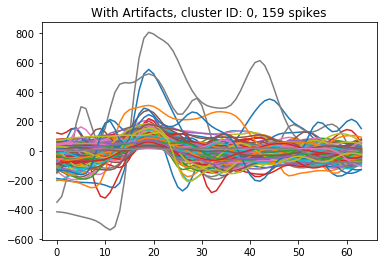

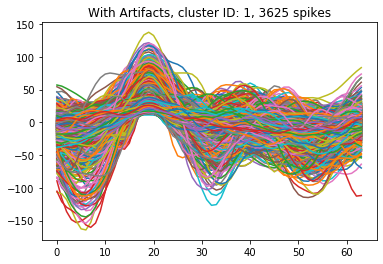

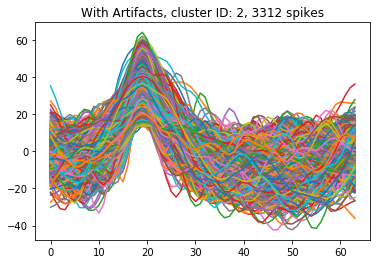

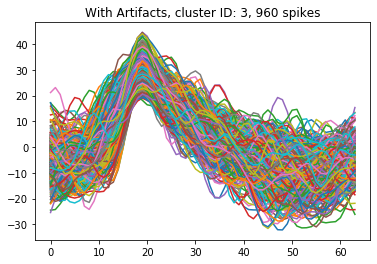

In [33]:
for idx, cluster_id in enumerate(cluster_id_art):
    where = np.where(times_art['cluster_class'].T[0] == cluster_id)
    
    spikes_for_cluster = times_art['spikes'][where]
    
    fig, ax = plt.subplots()
    for spk in spikes_for_cluster:
        ax = plt.plot(spk)
    
    nrspk = len(spikes_for_cluster)
    plt.title(f'With Artifacts, cluster ID: {int(cluster_id)}, {nrspk} spikes')
    plt.show()

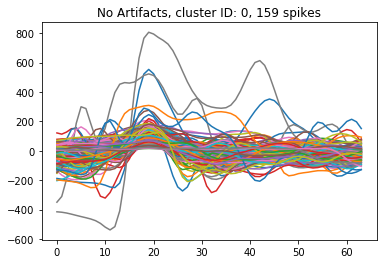

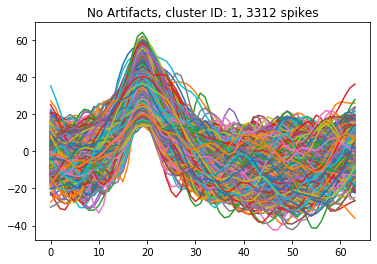

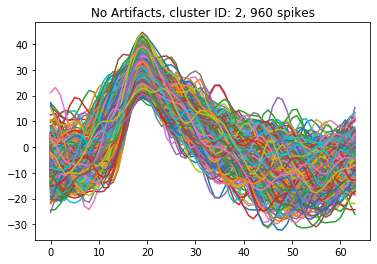

In [34]:
for idx, cluster_id in enumerate(cluster_id_noart):
    where = np.where(times_noart['cluster_class'].T[0] == cluster_id)
    
    spikes_for_cluster = times_noart['spikes'][where]
    
    fig, ax = plt.subplots()
    for spk in spikes_for_cluster:
        ax = plt.plot(spk)
    
    nrspk = len(spikes_for_cluster)
    plt.title(f'No Artifacts, cluster ID: {int(cluster_id)}, {nrspk} spikes')
    plt.show()

In [35]:
cinfo_noart = loadmat(os.path.join(opath, 'cluster_info_withoutArtifacts.mat'))
cinfo_art = loadmat(os.path.join(opath, 'cluster_info_withArtifacts.mat'))

In [38]:
cinfo_noart['cluster_info'][0]

array([array([[2, 2]], dtype=int16)], dtype=object)

In [39]:
cinfo_art['cluster_info'][0]

array([array([[-1,  2,  2]], dtype=int16)], dtype=object)